<a href="https://colab.research.google.com/github/Enamul-Hoq/Coucoursera/blob/master/Linear_Classification_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass
import tensorflow as tf
print(tf.__version__) 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


In [68]:
#load in the data

from sklearn.datasets import load_breast_cancer
data= load_breast_cancer()

In [69]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [70]:
type(data) # it seems like a dictionary but it is bunch object
# which work like a dictionary

sklearn.utils.Bunch

In [71]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [72]:
data.data.shape # this will give us the number of shape(n),number of features(d)

(569, 30)

In [73]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [74]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [75]:
data.target.shape

(569,)

In [76]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [77]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [33]:
from sklearn.model_selection import train_test_split

In [78]:
# X is your feature matrix, y is your target variable
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)


In [57]:
N, D = X_train.shape

In [79]:
N, D

(381, 30)

from sklearn.preprocessing import StandardScaler

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Input(shape=(D)), 
     tf.keras.layers.Dense(1, activation = 'sigmoid') 
     ])

In [83]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy", 
              metrics=['accuracy'])

In [84]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 1.2885 - accuracy: 0.1165 - val_loss: 1.2761 - val_accuracy: 0.1228
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1438 - accuracy: 0.1582 - val_loss: 1.1227 - val_accuracy: 0.1491
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0151 - accuracy: 0.1846 - val_loss: 0.9845 - val_accuracy: 0.2193
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9016 - accuracy: 0.2571 - val_loss: 0.8652 - val_accuracy: 0.3246
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8057 - accuracy: 0.3538 - val_loss: 0.7604 - val_accuracy: 0.4737
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7229 - accuracy: 0.4879 - val_loss: 0.6752 - val_accuracy: 0.6140
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.6286 - val_loss: 0.6026 - val_accuracy: 0.7632
Epoch 8/100


In [85]:
print("Train Score:", model.evaluate(X_train,y_train))
print("Train Score:", model.evaluate(X_test,y_test))

15/15 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9824
Train Score: [0.10245498269796371, 0.9824175834655762]
4/4 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.9912
Train Score: [0.08424514532089233, 0.9912280440330505]


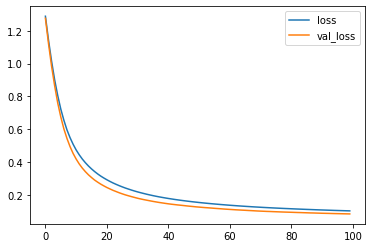

In [86]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss') 
plt.plot(r.history['val_loss'], label='val_loss') 
plt.legend();

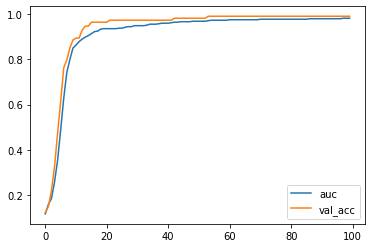

In [87]:

plt.plot(r.history['accuracy'],label='auc') 
plt.plot(r.history['val_accuracy'], label='val_acc') 
plt.legend();